<a href="https://colab.research.google.com/github/fernando12170209/Machine_learning_basico/blob/master/Tensorflow2AndKerasBootcamp/BasicArtificialNetwork/KerasRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Predict price from a house by some features

Proximamente: Deploy
https://towardsdatascience.com/deploy-tensorflow-models-9813b5a705d5
https://towardsdatascience.com/deploying-models-to-production-with-tensorflow-model-server-225a81859031

...

https://www.youtube.com/watch?v=264nTqrPCJQ
....savedModelBuilder(path)

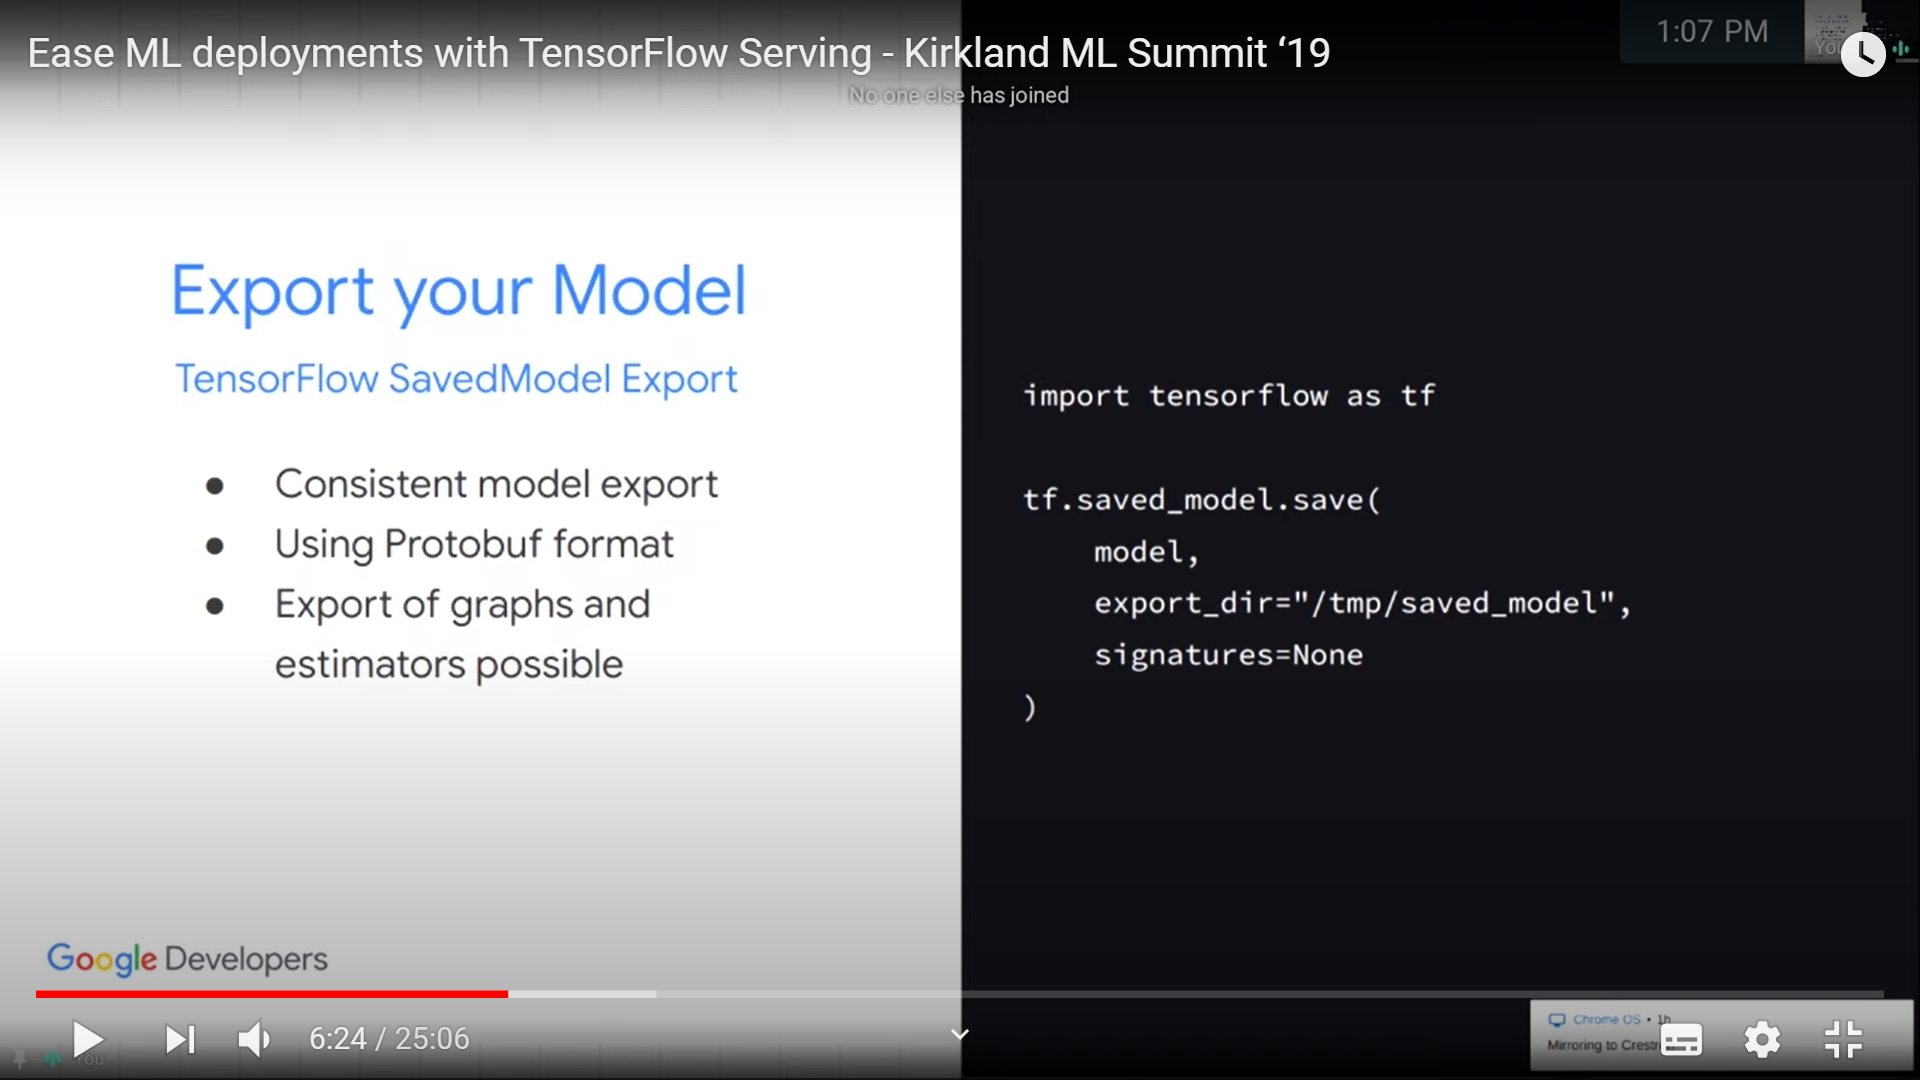

##How to Choose Loss Functions When Training Deep Learning Neural Networks


https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
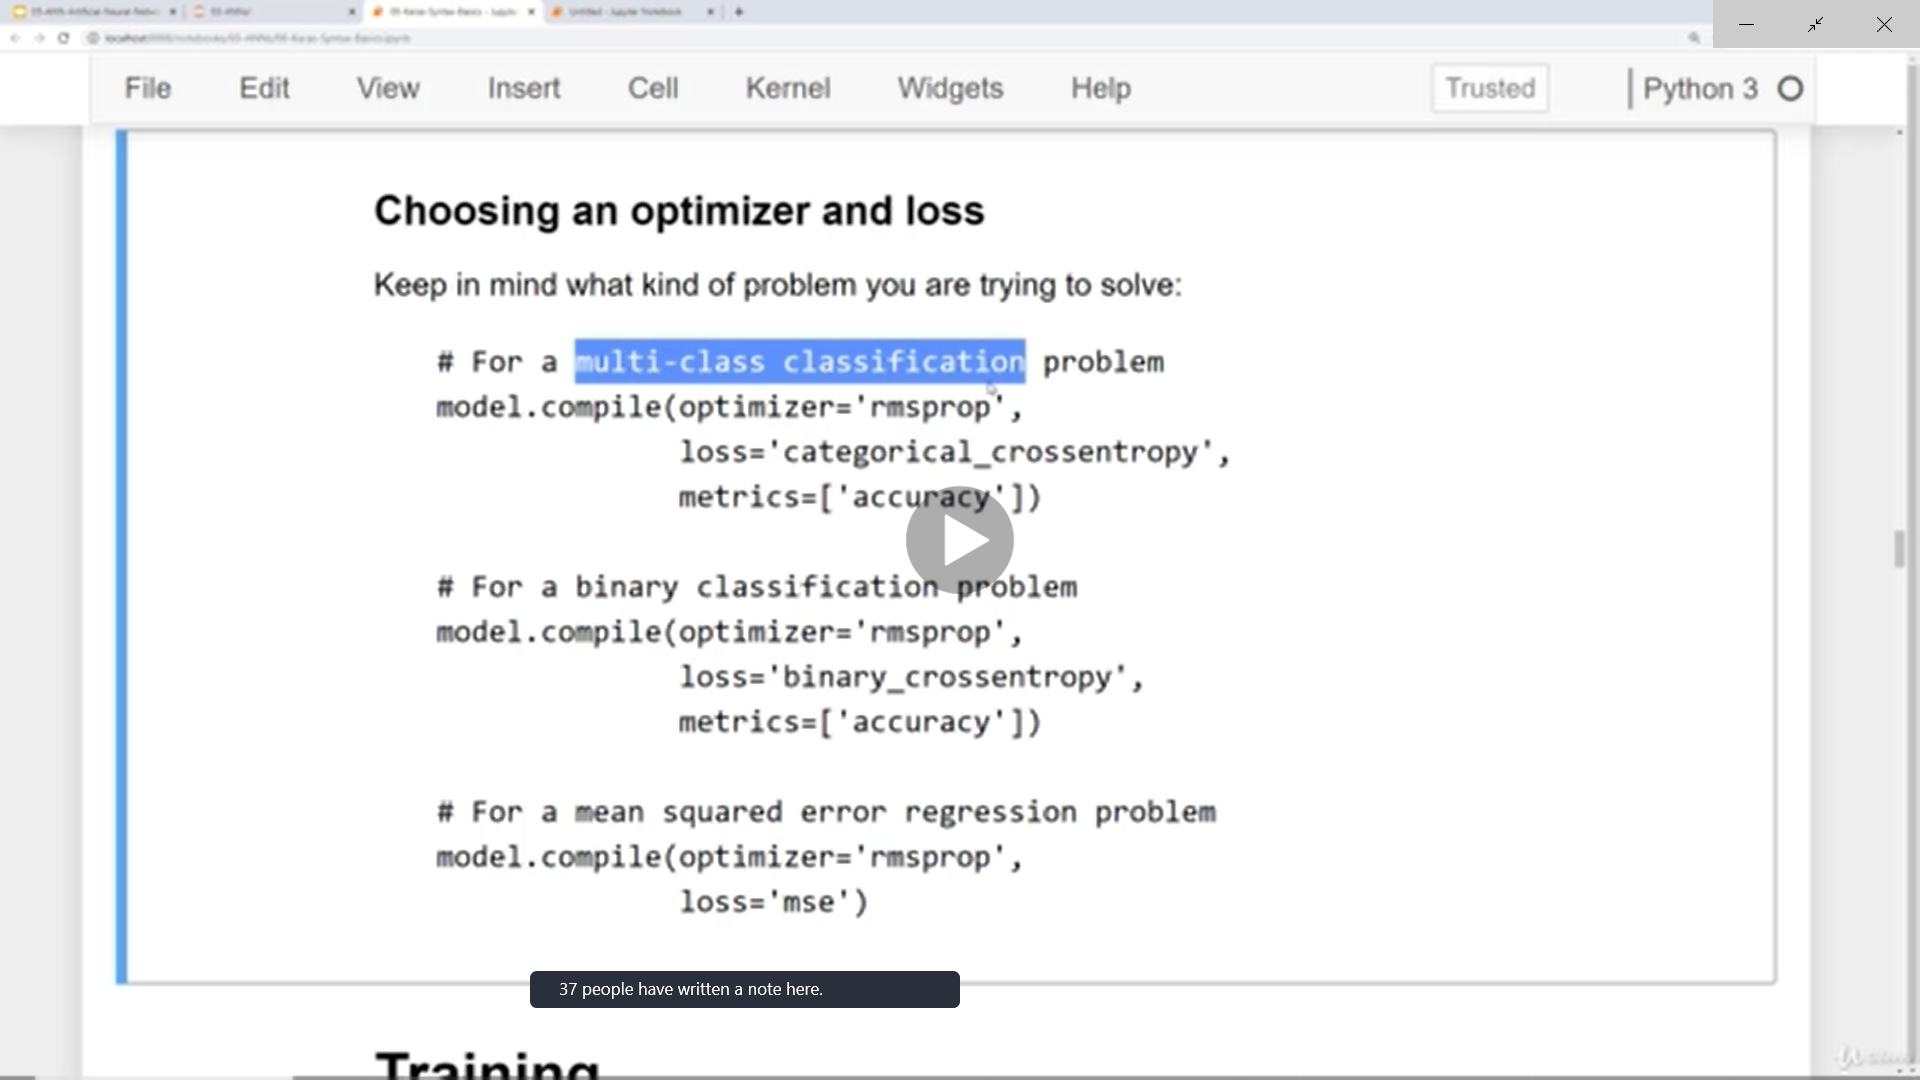

> Bloque con sangría



In [ ]:
#Predict the price from a house by some features
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import file
#Para cargar los archivos desde la plataforma, ver archivo en github

from google.colab import files
file = files.upload()
#

Saving kc_house_data.csv to kc_house_data.csv


In [ ]:
df=pd.read_csv('kc_house_data.csv')


In [ ]:
#Visuali
df.isnull().sum() #count missing data

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.describe().transpose() #Vista estadistica de los datos

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


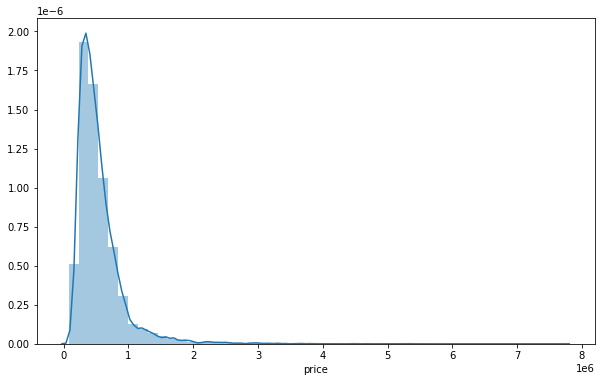

In [ ]:
plt.figure(figsize=(10,6))#coloca los axis en numeros que deben ser multiplicados por 10**6 (10 a la 6)
sns.distplot(df['price']) #distribution plot

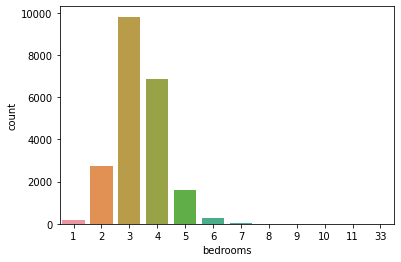

In [ ]:
sns.countplot(df['bedrooms'])#la mayoria tiene entre 3 a 4 cuartos

In [ ]:
#Correlacion
df.corr()['price'].sort_values() #sqr_fett living es la mayoyr correlacion

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

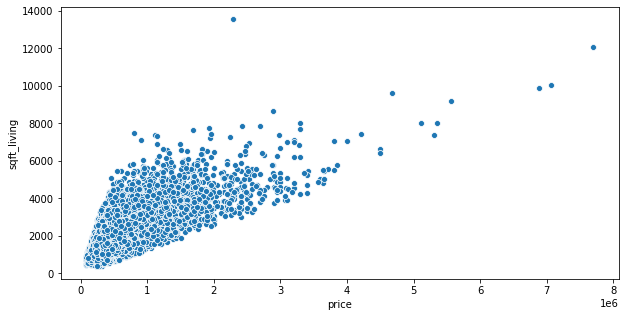

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

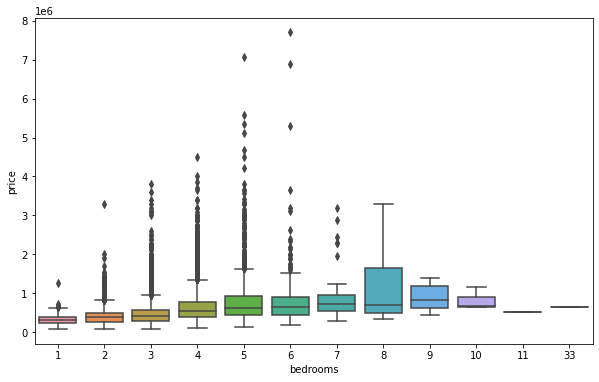

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms',y='price',data=df) #distribucion de precios por cuartos

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

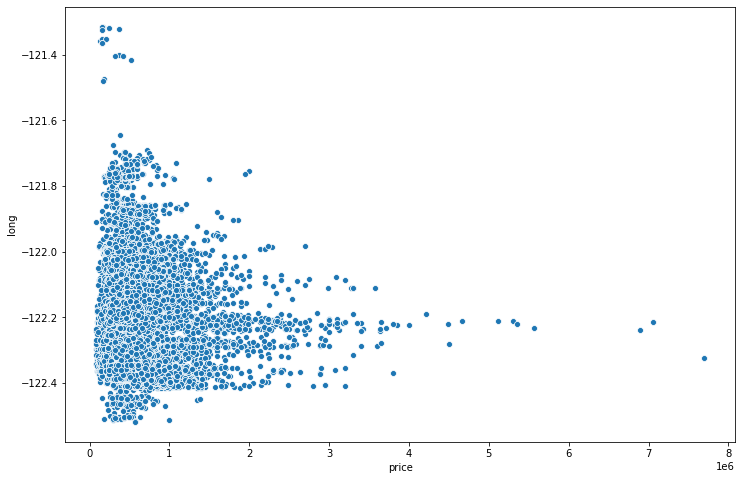

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

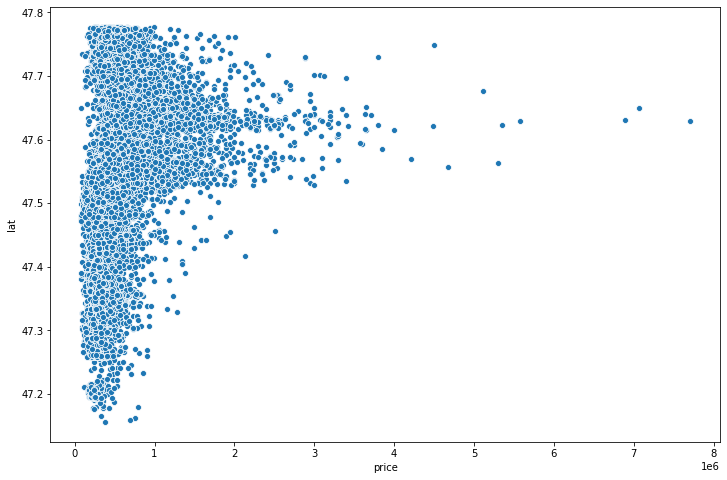

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='lat',data=df)

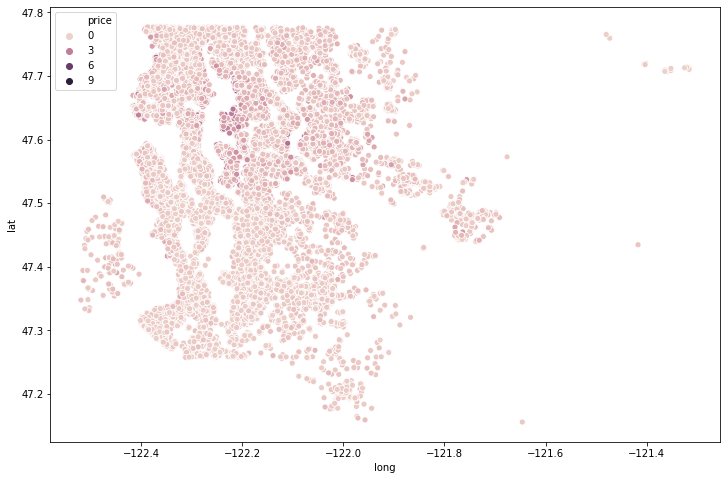

In [ ]:
#Expresar precio en lat y log
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df , hue='price')

In [ ]:
df.sort_values('price',ascending=False).head(20) #Devulve los 20 mas caros ()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [ ]:
#Cant que reprsenta el !% del total de casas
len(df)*0.01

215.97

In [ ]:
non_top_1_perc=df.sort_values('price',ascending=False).iloc[216:] #Devulve el !% de los casas mas caros ()

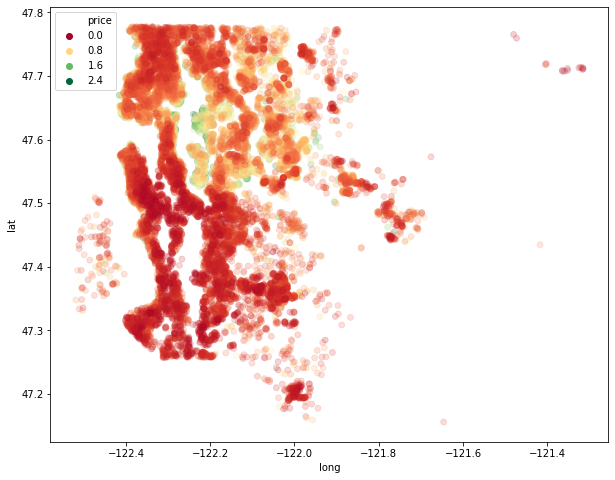

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc , 
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')

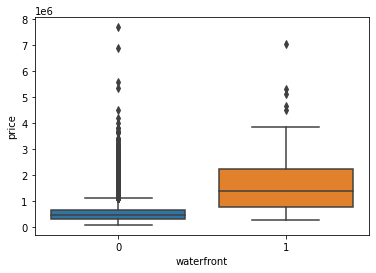

In [ ]:
sns.boxplot(x='waterfront',y='price',data=df) #Con vista a la cascada(1) el precio incrementa

In [ ]:
################################
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#descontamos el id
df=df.drop('id',axis=1)

In [ ]:
df['date']#convert to datetime

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [ ]:
df['date']=pd.to_datetime(df['date'])

In [ ]:
#Reseultado
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
df['year']=df['date'].apply(lambda date:date.year)
df['month']=df['date'].apply(lambda date:date.month)

In [ ]:
df.head()#You will see two news colum (year, month)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


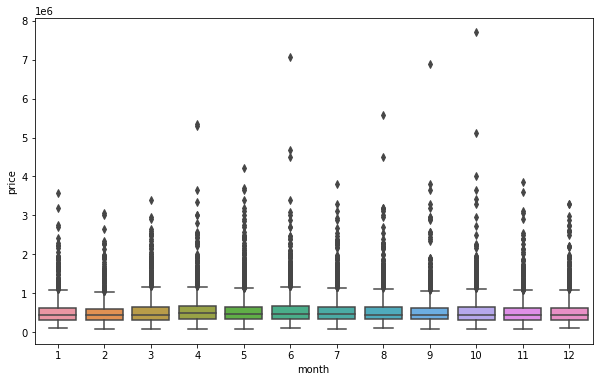

In [ ]:
#Verificar como varia el precio a lo largo de lso meses
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

#Segun la grafica no hay variacion significativa de los precios a lo largo de los meses

In [ ]:
#Preomedio de precios por mes
df.groupby('month').mean()['price']


month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

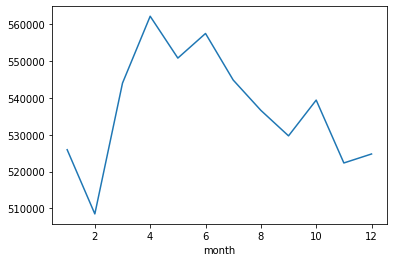

In [ ]:
#Preomedio de precios por mes
df.groupby('month').mean()['price'].plot()

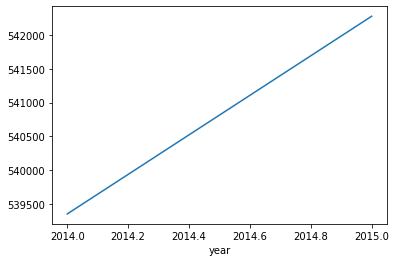

In [ ]:
#Preomedio de precios por año
df.groupby('year').mean()['price'].plot()

In [ ]:
#Eliminamos el campo date por no aportar a la determinacion del orecio 
df=df.drop('date',axis=1)

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [ ]:
df['zipcode'].value_counts() #cantiene 70 categorias

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [ ]:
#Eliminamos el campo zipcode(variable categorica) por no aportar a la determinacion del orecio 
df=df.drop('zipcode',axis=1)

In [ ]:
df['yr_renovated'].value_counts() #20683 css no fueron renovadas, el calor mas alto (2014) es la casa msa valiosa

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
df['sqft_basement'].value_counts() #13110 cass no tinen sotano ()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [ ]:
################  Fin de feature engeeniering

In [ ]:
#  .values es importante para Tensorflow
X=df.drop('price',axis=1).values
y=df['price'].values

In [ ]:
#?:Muestra la Ayuda del comamndo
from sklearn.model_selection import train_test_split #Para partir la dat en Train y Test
train_test_split?

In [ ]:
#random_state: es el seed en un ramdom 
X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler?
#Nomalizamos porque la neurona consume datos numericos contenidos usalmente entre 0 y 1. Por ejmplo los mapas de imagenes RGB(0-255) son reescalados a 0-1 o las palabrsa son pasadas en vectores tf-idf que van de 0 a 1

Link: https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works
##Core of the method

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

##Why to normalize prior to model fitting?

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

More here: https://towardsdatascience.com/everything-you-need-to-know-about-min-max-normalization-in-python-b79592732b79

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X_train=scaler.fit_transform(X_train)


In [ ]:
X_test=scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [ ]:
#la entrada a las neuronas debe ser tipicamnete el numero de caracteristicas del dataset
X_train.shape


(15117, 19)

In [ ]:
X_test.shape

(6480, 19)

In [ ]:
model=Sequential()
#mpieza con 19 neuronas la rimera capa por que es el numero de campos o features en el datset X_Train
model.add(Dense(19,activation='relu'))

#Aconytinuacion desarrollamos campas ocultas o hidden con viversas neuronas y funciones de activacion
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
#la salida es unica dado que calculamos un unico VAlor (precio), tipico de una regresion o estimacion
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
##Caundo aplicar earlySoptting??

##Caundo aplicar dropoutLayers??

In [ ]:
#Tracking el performances validation_data en test_data
#Verbose=1 por defecto, imprime el loss , Verbose=0 no imprime en pantalla
#batch_size  entrega paquetes de registrso en   128 registros por cada epcoh o iteracion entreanmientos
#model.fit(x=X_train,y=y_train,
#          validation_data=(X_test,y_test),batch_size=128,epochs=200)

####### NO OLVIDAR .values

model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 0s 3ms/step - loss: 430240923648.0000 - val_loss: 418919972864.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 429177929728.0000 - val_loss: 415161516032.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 413373890560.0000 - val_loss: 378441170944.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 334083719168.0000 - val_loss: 250961510400.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 180845805568.0000 - val_loss: 113494220800.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 103498596352.0000 - val_loss: 95199592448.0000
Epoch 7/400
119/119 [==============================] - 0s 2ms/step - loss: 97640251392.0000 - val_loss: 93623230464.0000
Epoch 8/400
119/119 [==============================] - 0s 2ms/step - loss: 95952068608.0000 - val_loss: 92052103168.0000
Epoch 9/400
119/119 [

In [ ]:
pd.DataFrame(model.history.history) #devuelve un diccionanio

,loss,val_loss
0,4.302409e+11,4.189200e+11
1,4.291779e+11,4.151615e+11
2,4.133739e+11,3.784412e+11
3,3.340837e+11,2.509615e+11
4,1.808458e+11,1.134942e+11
...,...,...
395,2.868442e+10,2.628030e+10
396,2.866213e+10,2.628057e+10
397,2.859815e+10,2.631231e+10
398,2.861015e+10,2.624653e+10


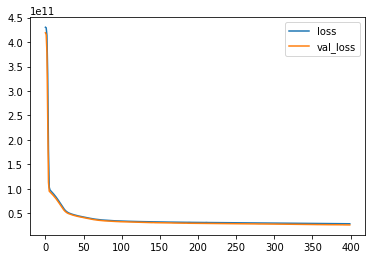

In [ ]:

pd.DataFrame(model.history.history).plot()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [ ]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.        ,
        0.63636364],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.        ,
        0.81818182],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.        ,
        0.90909091],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 0.        ,
        1.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 1.        ,
        0.09090909],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.        ,
        0.45454545]])

In [ ]:
predictions = model.predict(X_test)

In [ ]:
mean_absolute_error(y_test,predictions)

100696.74345823689

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

162012.36422223525

In [ ]:
explained_variance_score(y_test,predictions)

0.8021727526806576

In [ ]:
df['price'].mean()

540296.5735055795

In [ ]:
df['price'].median()

450000.0

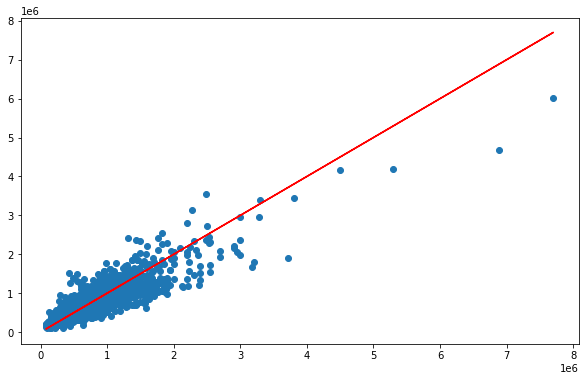

In [ ]:
# Our predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [ ]:
errors = y_test.reshape(6480, 1) - predictions

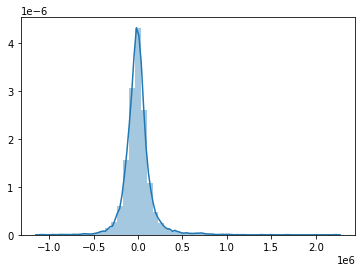

In [ ]:
sns.distplot(errors)

In [ ]:
#Predicting on a brand new house
single_house = df.drop('price',axis=1).iloc[0]

In [ ]:
single_house = scaler.transform(single_house.reshape(-1, 19))

In [ ]:
single_house

array([[-8.00000000e-02, -6.72000000e-02, -3.82540058e-02,
        -3.14989464e-04, -4.00000000e-01,  0.00000000e+00,
         0.00000000e+00, -1.25000000e-01, -2.60000000e-01,
        -4.92532815e-02,  0.00000000e+00, -1.65175803e+01,
         0.00000000e+00, -7.49306780e+01,  1.01940704e+02,
        -6.86350139e-02, -7.68530530e-04, -2.01400000e+03,
        -1.65289256e-02]])

In [ ]:
model.predict(single_house)

array([[3235865.8]], dtype=float32)

In [ ]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64

In [ ]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
